In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [246]:
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

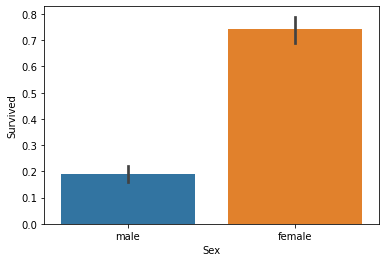

In [247]:
import seaborn as sns

sns.barplot(data=data, x='Sex', y='Survived')


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

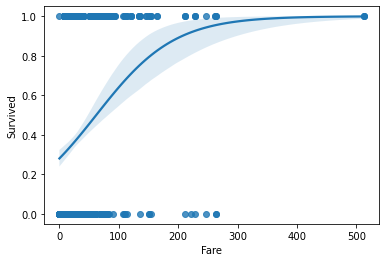

In [248]:
sns.regplot(data=data, x='Fare', y='Survived', logistic=True)

In [249]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [251]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [252]:
from sklearn.model_selection import train_test_split

target = "Survived"

X = data.drop(target, axis=1)
y = data[[target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [253]:
# On importe tout
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Je fais des listes de features numériques et catégorielles
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
categoric_features = X_train.select_dtypes(include='object').columns.tolist()

# Je créé un pipeline qui remplace des valeurs manquantes ET PUIS les standardise
numeric_pipeline = Pipeline(steps=[
  ('numeric_imputer', SimpleImputer(strategy='median')),
  ('numeric_scaler', StandardScaler())
])

# Je créé un pipeline qui remplace des valeurs manquantes ET PUIS les encode
categoric_pipeline = Pipeline(steps=[
  ('categoric_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
  ('categoric_encoder', OneHotEncoder(drop='first'))
])

# Je combine mes Pipelines ensemble dans mon ColumnTransformer
feature_encoder = ColumnTransformer(transformers=[
  ('num', numeric_pipeline, numeric_features),
  ('cat', categoric_pipeline, categoric_features)
])

feature_encoder.fit(X_train)

X_train = feature_encoder.transform(X_train)
X_test = feature_encoder.transform(X_test)

In [254]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

c:\Users\darla\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [255]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)
print(y_train_pred[0:5])
print(y_test_pred[0:5])

[0 0 1 1 1]
[0 0 0 0 1]


In [256]:
a = model.score(X_train, y_train)
b = model.score(X_test, y_test)

print(a, b)

0.8061797752808989 0.8044692737430168


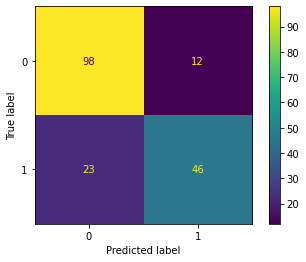

In [257]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(cm)
disp.plot()

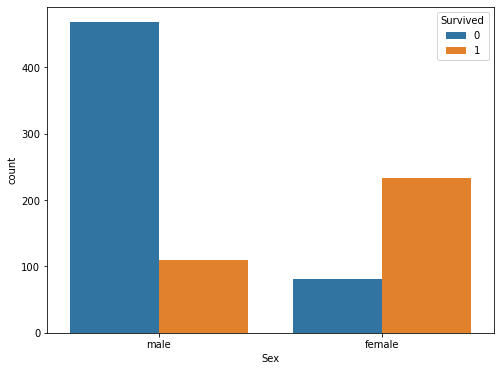

In [258]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

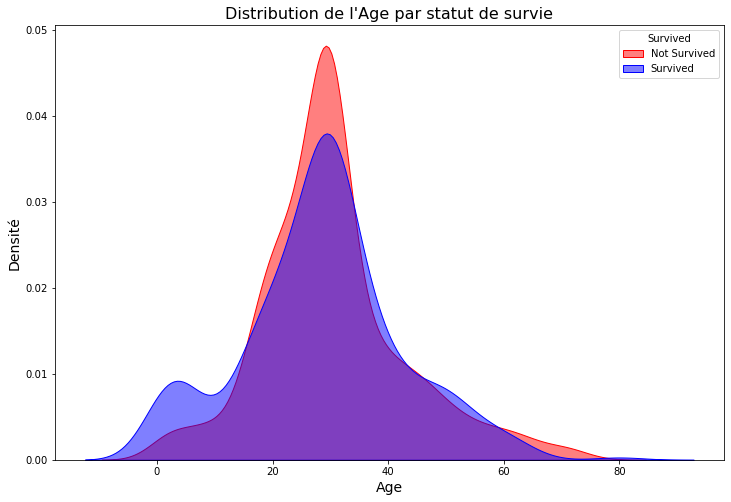

In [271]:
plt.figure(figsize=(12, 8))

# Affichage de la courbe de densité (KDE) pour chaque groupe (Survived)
sns.kdeplot(data=data[data['Survived'] == 0], x='Age', fill=True, label='Not Survived', color='red', alpha=0.5)
sns.kdeplot(data=data[data['Survived'] == 1], x='Age', fill=True, label='Survived', color='blue', alpha=0.5)

# Ajouter un titre et une légende
plt.title('Distribution de l\'Age par statut de survie', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.legend(title='Survived')

# Afficher le graphique
plt.show()

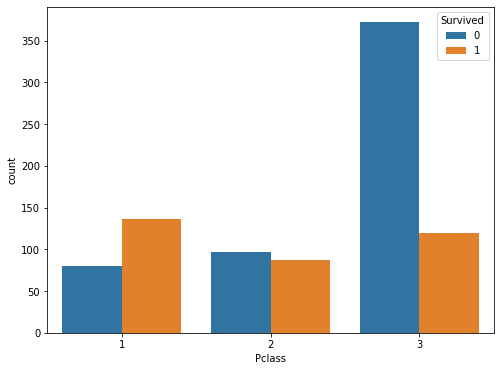

In [259]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

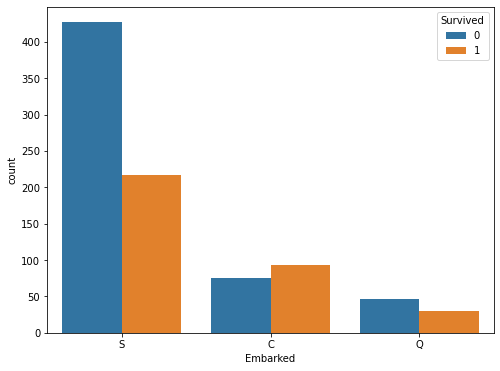

In [263]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.show()